# 1. Lập trình PCA

## 1.1. Tải tập dữ liệu Iris

Import các thư viện cần thiết cho toàn bộ notebook. Đồng thời tải bộ dữ liệu Iris, tách riêng các đặc trưng (features) vào `X` và nhãn (target) vào `y`

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
from PCA import *
from Utils.Utils import *
import warnings

warnings.filterwarnings("ignore")

iris = load_iris()
X = pd.DataFrame(iris['data'], columns = iris['feature_names'])
y = pd.DataFrame(iris['target'], columns = ['species'])

## 1.2. Phân tích dữ liệu khám phá (EDA) trên tập Iris

Hiển thị 5 dòng đầu tiên của DataFrame đặc trưng `X` để có cái nhìn tổng quan về dữ liệu.

In [2]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Cung cấp thông tin tóm tắt về DataFrame `X`, bao gồm kiểu dữ liệu của mỗi cột và số lượng giá trị không null.

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Tính toán và hiển thị các thống kê mô tả cho các cột numerical trong DataFrame `X`.

In [4]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Kết hợp DataFrame đặc trưng `X` và DataFrame nhãn `y` thành một DataFrame duy nhất `X_all`.

Sau đó vẽ biểu đồ phân tán cặp cho tất cả các đặc trưng, tô màu theo loài hoa (species) và hiển thị histogram trên đường chéo chính để giúp trực quan hóa mối quan hệ giữa các đặc trưng và sự phân bố của chúng theo từng loài.

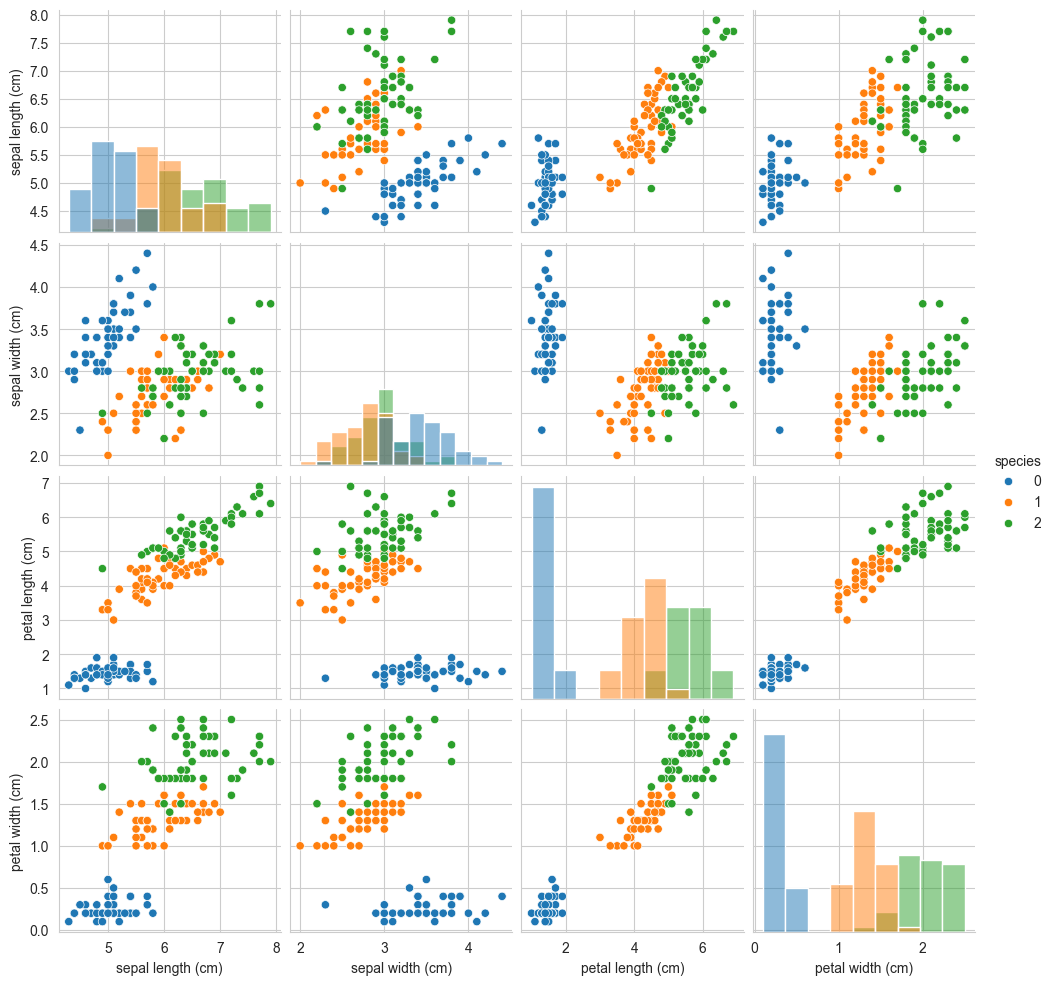

In [5]:
X_all = pd.concat([X, y], axis = 1)

sns.pairplot(X_all, hue='species', palette='tab10', diag_kind='hist')

# 2. Áp dụng PCA (MyPCA) trên tập Iris

Chuyển đổi DataFrame thành các mảng NumPy.

In [6]:
X, y = np.array(X), np.array(y)

Giảm chiều dữ liệu xuống còn 2 thành pnần chính và sau đó khớp mô hình PCA này với `X`. Quá trình `fit` sẽ thực hiện các bước:

<div style="text-align: center;">
    <img src="Images/pca_procedure.png" alt="PCA Procedure" width="600"/>
</div>

In [7]:
my_pca = MyPCA(n_components = 2)
my_pca.fit(X)

--- Kết quả Fit ---
Số thành phần chính được chọn: 2
Tỷ lệ phương sai giải thích (EVR):
  PC1: 0.9246
  PC2: 0.0531

Tỷ lệ phương sai giải thích tích lũy (CEVR):
  PC1 đến PC1: 0.9246
  PC1 đến PC2: 0.9777

Tổng phương sai được giải thích: 0.9777
--------------------


Sử dụng mô hình `MyPCA` đã khớp để biến đổi (transform) dữ liệu đặc trưng `X` ban đầu của tập Iris thành không gian 2 chiều mới. Phép biến đổi được thực hiện bằng cách chiếu dữ liệu đã chuẩn hóa lên các thành phần chính: $X = X_{centered} W$.

In [8]:
# Transform
X_transformed = my_pca.transform(X)
print("\nDữ liệu sau khi biến đổi (X_transformed) có shape:", X_transformed.shape)
print("Một vài mẫu dữ liệu sau khi biến đổi:")
print(X_transformed[:5, :])


Dữ liệu sau khi biến đổi (X_transformed) có shape: (150, 2)
Một vài mẫu dữ liệu sau khi biến đổi:
[[ 2.68412563  0.31939725]
 [ 2.71414169 -0.17700123]
 [ 2.88899057 -0.14494943]
 [ 2.74534286 -0.31829898]
 [ 2.72871654  0.32675451]]


# Kiểm tra kết quả MyPCA với PCA của thư viện Scikit-learn

Thực hiện PCA trên cùng dữ liệu Iris `X` sử dụng triển khai `PCA` từ thư viện `sklearn` với `n_components=2` để so sánh và kiểm chứng kết quả của lớp `MyPCA` tự xây dựng. Đoạn code này khởi tạo, huấn luyện mô hình `SklearnPCA`, biến đổi dữ liệu và in ra các thông số quan trọng như tỷ lệ phương sai giải thích (EVR), phương sai giải thích bởi từng thành phần, và tỷ lệ phương sai giải thích tích lũy (CEVR), cùng với shape và một vài mẫu của dữ liệu đã biến đổi.

In [9]:
from sklearn.decomposition import PCA as SklearnPCA

print("--- Kiểm tra với sklearn.decomposition.PCA ---")
# 1. Khởi tạo PCA của sklearn
sklearn_pca = SklearnPCA(n_components=2)

# 2. Khớp mô hình với dữ liệu X
sklearn_pca.fit(X)

# 3. Biến đổi dữ liệu X
X_transformed_sklearn = sklearn_pca.transform(X)

print("\nTỷ lệ phương sai giải thích (EVR) cho từng thành phần (sklearn.explained_variance_ratio_):")
# Đây là EVR cho n_components đã chọn
print(sklearn_pca.explained_variance_ratio_)
# Tương đương với self.explained_variance_ratio_[:n_components] của MyPCA

print("\nPhương sai giải thích bởi từng thành phần (sklearn.explained_variance_):")
# Đây là các trị riêng tương ứng với n_components đã chọn, không phải tỷ lệ
print(sklearn_pca.explained_variance_)
# Tương đương với self.explained_variance_[:n_components] của MyPCA

# sklearn không có thuộc tính CEVR trực tiếp, nhưng có thể dễ dàng tính từ EVR
cumulative_explained_variance_ratio_sklearn = np.cumsum(sklearn_pca.explained_variance_ratio_)
print("\nTỷ lệ phương sai giải thích tích lũy (CEVR) tính từ sklearn.explained_variance_ratio_:")
for i, cum_ratio in enumerate(cumulative_explained_variance_ratio_sklearn):
    print(f"  PC1 đến PC{i+1}: {cum_ratio:.4f}")
print(f"Tổng phương sai được giải thích bởi {sklearn_pca.n_components_} thành phần: {cumulative_explained_variance_ratio_sklearn[-1]:.4f}")
# Giá trị cuối cùng này tương đương với self.cumulative_explained_variance_ratio_[n_components-1] của MyPCA

print("\nDữ liệu sau khi biến đổi (X_transformed_sklearn) có shape:", X_transformed_sklearn.shape)
print("Một vài mẫu dữ liệu sau khi biến đổi (sklearn):")
print(X_transformed_sklearn[:5, :]) # Tương đương với X_transformed của MyPCA
print("---------------------------------------------")

--- Kiểm tra với sklearn.decomposition.PCA ---

Tỷ lệ phương sai giải thích (EVR) cho từng thành phần (sklearn.explained_variance_ratio_):
[0.92461872 0.05306648]

Phương sai giải thích bởi từng thành phần (sklearn.explained_variance_):
[4.22824171 0.24267075]

Tỷ lệ phương sai giải thích tích lũy (CEVR) tính từ sklearn.explained_variance_ratio_:
  PC1 đến PC1: 0.9246
  PC1 đến PC2: 0.9777
Tổng phương sai được giải thích bởi 2 thành phần: 0.9777

Dữ liệu sau khi biến đổi (X_transformed_sklearn) có shape: (150, 2)
Một vài mẫu dữ liệu sau khi biến đổi (sklearn):
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]
---------------------------------------------


# 3. Bài toán Phân cụm K-Means (trên tập ABIDE II)

## 3.1. Tiền xử lý dữ liệu cho tập ABIDE II

Tải bộ dữ liệu ABIDE II từ file CSV (`ABIDE2.csv`). Tách cột 'group' (chứa nhãn Cancer/Normal) làm biến mục tiêu `y`, phần còn lại là đặc trưng `X`.

In [10]:
X = pd.read_csv('Dataset/ABIDE2.csv', index_col = 0)
y = X['group']

Hiển thị 5 dòng đầu tiên của DataFrame đặc trưng `X` của bộ dữ liệu ABIDE II.

In [11]:
X.head(5)

,site,subject,age,group,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,fsArea_L_V4_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,ABIDEII-KKI_1,29293,8.893151,Cancer,2750.0,306.0,354.0,2123.0,1451.0,1128.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,ABIDEII-OHSU_1,28997,12.000000,Cancer,2836.0,186.0,354.0,2261.0,1584.0,1241.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,ABIDEII-GU_1,28845,8.390000,Normal,3394.0,223.0,373.0,2827.0,1816.0,1299.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,ABIDEII-NYU_1,29210,8.300000,Cancer,3382.0,266.0,422.0,2686.0,1893.0,1359.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,ABIDEII-EMC_1,29894,7.772758,Normal,3080.0,161.0,346.0,2105.0,1307.0,1004.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128


Cung cấp thông tin tóm tắt về DataFrame `X` của bộ dữ liệu ABIDE II.

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004 entries, 0 to 1003
Columns: 1444 entries, site to fsCT_R_p24_ROI
dtypes: float64(1441), int64(1), object(2)
memory usage: 11.1+ MB


Hiển thị các thống kê mô tả cho các cột số trong DataFrame `X` của bộ dữ liệu ABIDE II.

In [13]:
X.describe()

,subject,age,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,fsArea_L_V4_ROI,fsArea_L_V8_ROI,fsArea_L_4_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.00000,1004.000000,1004.000000,1004.000000,...,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,29278.616534,15.101264,3161.415339,226.266932,395.445219,2613.914343,1747.64741,1298.107570,262.410359,1811.776892,...,2.543007,3.256986,2.677017,2.721997,3.173171,2.809079,3.051686,2.691974,2.867733,3.200925
std,374.424343,9.433702,495.962723,68.517782,67.150610,343.635256,235.02218,205.374357,58.737676,247.112768,...,0.346484,0.470978,0.317000,0.337975,0.323499,0.330795,0.375022,0.322569,0.351564,0.394258
min,28675.000000,5.128000,1423.000000,80.000000,166.000000,981.000000,791.00000,592.000000,98.000000,936.000000,...,1.633000,1.682000,1.563000,1.652000,1.935000,1.399000,1.599000,1.647000,1.790000,1.138000
25%,28974.750000,9.280137,2846.750000,172.000000,352.000000,2433.000000,1603.00000,1170.750000,225.000000,1649.000000,...,2.309750,3.004000,2.487500,2.507000,2.987750,2.601250,2.835750,2.490000,2.640000,2.957500
50%,29247.500000,11.667580,3136.500000,225.000000,396.500000,2619.000000,1746.50000,1295.000000,263.000000,1798.000000,...,2.525500,3.357500,2.693500,2.724000,3.206000,2.852500,3.085500,2.709000,2.883500,3.221000
75%,29542.250000,18.015000,3454.250000,275.000000,438.250000,2822.000000,1900.25000,1439.000000,303.000000,1955.000000,...,2.784500,3.594250,2.883000,2.953250,3.389250,3.027250,3.313000,2.895000,3.097500,3.458000
max,30167.000000,64.000000,4740.000000,494.000000,641.000000,3588.000000,2477.00000,2024.000000,534.000000,3221.000000,...,3.448000,4.219000,3.735000,3.795000,4.136000,3.630000,4.083000,3.990000,3.961000,4.328000


Thực thi một quy trình thử nghiệm bao gồm:

* Tiền xử lý dữ liệu (xử lý giá trị thiếu, áp dụng biến đổi log cho các đặc trưng có độ lệch lớn hơn ngưỡng, tạo đặc trưng đa thức, chuẩn hóa)

* Giảm chiều bằng PCA và phân cụm bằng thuật toán K-Means và Mixture of Gaussian (với `k=2` cụm).

Hiệu suất của K-Means sau khi giảm chiều xuống còn 1 thành phần. (Kết quả tốt nhất sau nhiều thử nghiệm)

In [14]:
run_experiment(
    "Dataset/ABIDE2.csv",
    skew_threshold=0.1,
    component_range=[1],
    k=2,
    visualize=False,
    algorithm="KMeans",
    use_poly=False
)

=== Experiment started at 20250516_200017 ===
Dataset: Dataset/ABIDE2.csv

--- Feature Transformation ---
Loading data from Dataset/ABIDE2.csv...
Original data shape: (1004, 1445)
Number of numeric features: 1443
Number of highly skewed features: 1220
Standardizing features...
Transformed data saved to ./experiment_20250516_200017\transformed_data.csv
Final data shape: (1004, 1444)

Transformation Summary:
Transformed data shape: (1004, 1443)

--- PCA and Clustering Experiments ---

Testing with n_components=1
--- Kết quả Fit ---
Số thành phần chính được chọn: 1
Tỷ lệ phương sai giải thích (EVR):
  PC1: 0.2681

Tỷ lệ phương sai giải thích tích lũy (CEVR):
  PC1 đến PC1: 0.2681

Tổng phương sai được giải thích: 0.2681
--------------------
Explained variance ratio: 0.2681
Clustering accuracy: 0.5508
F1 score: 0.5387
Silhouette score: 0.5695

Results saved to ./experiment_20250516_200017\experiment_results.csv

Best configuration:
n_components: 1.0
Accuracy: 0.5508
F1 score: 0.5387
Silhou

'./experiment_20250516_200017'

Kết quả của thuật toán K-Means khi sử dụng thêm đặc trưng đa thức, kết quả đạt cao nhất khi số thành phần PCA bằng 2.

In [15]:
run_experiment(
    "Dataset/ABIDE2.csv",
    skew_threshold=0.1,
    component_range=[2],
    k=2,
    visualize=False,
    algorithm="KMeans",
    use_poly=True
)

=== Experiment started at 20250516_200026 ===
Dataset: Dataset/ABIDE2.csv

--- Feature Transformation ---
Loading data from Dataset/ABIDE2.csv...
Original data shape: (1004, 1445)
Number of numeric features: 1443
Number of highly skewed features: 1220
Number of features selected for polynomial transformation: 88
Generating interaction terms...
Standardizing features...
Transformed data saved to ./experiment_20250516_200026\transformed_data.csv
Final data shape: (1004, 5360)

Transformation Summary:
Transformed data shape: (1004, 5359)

--- PCA and Clustering Experiments ---

Testing with n_components=2
--- Kết quả Fit ---
Số thành phần chính được chọn: 2
Tỷ lệ phương sai giải thích (EVR):
  PC1: 0.4341
  PC2: 0.0756

Tỷ lệ phương sai giải thích tích lũy (CEVR):
  PC1 đến PC1: 0.4341
  PC1 đến PC2: 0.5096

Tổng phương sai được giải thích: 0.5096
--------------------
Explained variance ratio: 0.5096
Clustering accuracy: 0.5837
F1 score: 0.5726
Silhouette score: 0.4615

Results saved to .

'./experiment_20250516_200026'

Trong thử nghiệm này, thuật toán phân cụm được đổi thành Gaussian Mixture Model (GMM).

Nếu không sử dụng đặc trưng đa thức, kết quả tốt nhất của mô hình GMM đat cao nhất với ngưỡng độ lệch là 1.0 và số thành phần PCA là 10

In [16]:
run_experiment(
    "Dataset/ABIDE2.csv",
    skew_threshold=1.0,
    component_range=[10],
    k=2,
    visualize=False,
    algorithm="GMM",
    use_poly=False
)

=== Experiment started at 20250516_200100 ===
Dataset: Dataset/ABIDE2.csv

--- Feature Transformation ---
Loading data from Dataset/ABIDE2.csv...
Original data shape: (1004, 1445)
Number of numeric features: 1443
Number of highly skewed features: 65
Standardizing features...
Transformed data saved to ./experiment_20250516_200100\transformed_data.csv
Final data shape: (1004, 1444)

Transformation Summary:
Transformed data shape: (1004, 1443)

--- PCA and Clustering Experiments ---

Testing with n_components=10
--- Kết quả Fit ---
Số thành phần chính được chọn: 10
Tỷ lệ phương sai giải thích (EVR):
  PC1: 0.2548
  PC2: 0.1012
  PC3: 0.0218
  PC4: 0.0155
  PC5: 0.0135
  PC6: 0.0124
  PC7: 0.0116
  PC8: 0.0101
  PC9: 0.0094
  PC10: 0.0087

Tỷ lệ phương sai giải thích tích lũy (CEVR):
  PC1 đến PC1: 0.2548
  PC1 đến PC2: 0.3560
  PC1 đến PC3: 0.3779
  PC1 đến PC4: 0.3933
  PC1 đến PC5: 0.4068
  PC1 đến PC6: 0.4192
  PC1 đến PC7: 0.4308
  PC1 đến PC8: 0.4409
  PC1 đến PC9: 0.4503
  PC1 đến P

'./experiment_20250516_200100'

Thử nghiệm này tiếp tục sử dụng thuật toán GMM, nhưng giảm số thành phần chính xuống còn 5, đặt lại ngưỡng độ lệch là 0.1, và lần này có sử dụng đặc trưng đa thức

Mục đích là đánh giá sự kết hợp của GMM, một số lượng thành phần PCA vừa phải, và việc sử dụng đặc trưng đa thức.

In [17]:
run_experiment(
    "Dataset/ABIDE2.csv",
    skew_threshold=0.1,
    component_range=[5],
    k=2,
    visualize=False,
    algorithm="GMM",
    use_poly=True
)

=== Experiment started at 20250516_200105 ===
Dataset: Dataset/ABIDE2.csv

--- Feature Transformation ---
Loading data from Dataset/ABIDE2.csv...
Original data shape: (1004, 1445)
Number of numeric features: 1443
Number of highly skewed features: 1220
Number of features selected for polynomial transformation: 88
Generating interaction terms...
Standardizing features...
Transformed data saved to ./experiment_20250516_200105\transformed_data.csv
Final data shape: (1004, 5360)

Transformation Summary:
Transformed data shape: (1004, 5359)

--- PCA and Clustering Experiments ---

Testing with n_components=5
--- Kết quả Fit ---
Số thành phần chính được chọn: 5
Tỷ lệ phương sai giải thích (EVR):
  PC1: 0.4341
  PC2: 0.0756
  PC3: 0.0334
  PC4: 0.0276
  PC5: 0.0212

Tỷ lệ phương sai giải thích tích lũy (CEVR):
  PC1 đến PC1: 0.4341
  PC1 đến PC2: 0.5096
  PC1 đến PC3: 0.5430
  PC1 đến PC4: 0.5706
  PC1 đến PC5: 0.5917

Tổng phương sai được giải thích: 0.5917
--------------------
Explained vari

'./experiment_20250516_200105'

Thử nghiệm cuối cùng đạt accuracy cao nhất, sử dụng thuật toán GMM với số thành phần chính là 33. Dataset là của ABIDE2 nhưng đã được tiền xử lí và lưu với tên "encoded_data.csv", nằm trong folder "Dataset".

In [18]:
run_experiment(
    "Dataset/encoded_data.csv",
    skew_threshold=0.75,
    component_range=[33],
    algorithm="GMM",
)

=== Experiment started at 20250516_200225 ===
Dataset: Dataset/encoded_data.csv

--- Feature Transformation ---
Loading data from Dataset/encoded_data.csv...
Original data shape: (1004, 129)
Number of numeric features: 128
Number of highly skewed features: 18
Number of features selected for polynomial transformation: 29
Generating interaction terms...
Standardizing features...
Transformed data saved to ./experiment_20250516_200225\transformed_data.csv
Final data shape: (1004, 564)

Transformation Summary:
Visualizations saved to 'feature_transformations.png'
Transformed data shape: (1004, 563)

--- PCA and Clustering Experiments ---

Testing with n_components=33
--- Kết quả Fit ---
Số thành phần chính được chọn: 33
Tỷ lệ phương sai giải thích (EVR):
  PC1: 0.1317
  PC2: 0.0398
  PC3: 0.0344
  PC4: 0.0327
  PC5: 0.0288
  PC6: 0.0278
  PC7: 0.0250
  PC8: 0.0237
  PC9: 0.0236
  PC10: 0.0228
  PC11: 0.0219
  PC12: 0.0192
  PC13: 0.0188
  PC14: 0.0176
  PC15: 0.0170
  PC16: 0.0168
  PC17: 0

'./experiment_20250516_200225'